In [765]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [766]:
model=pd.read_csv(r"/content/drive/MyDrive/WildBlueberryPollinationSimulationData.csv")

In [767]:
model.shape

(777, 18)

In [768]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [769]:
model.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

<Axes: >

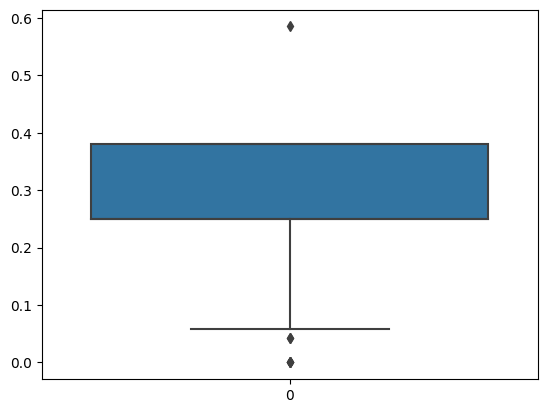

In [770]:
sns.boxplot(model["bumbles"])

<Axes: >

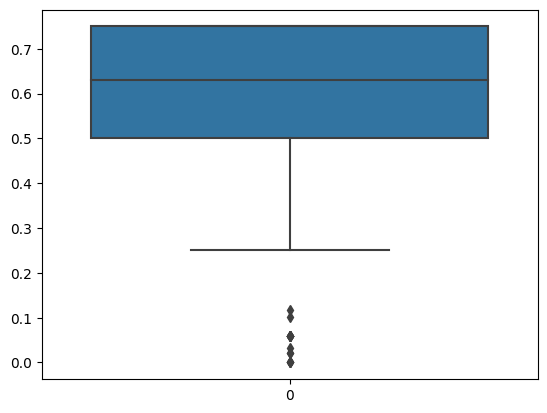

In [771]:
sns.boxplot(model["osmia"])

In [772]:
#calculating Inter-quartile Range (IQR)
q1 = model.quantile(0.25)
q3 = model.quantile(0.75)
iqr = q3 - q1
print(iqr)

Row#                     388.000000
clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange          11.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange          10.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays               20.230000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64


In [773]:
iqr_data = model [~((model < (q1 - 1.5 * iqr)) | (model> (q3 + 1.5 * iqr))).any(axis=1)]
iqr_data.shape

(752, 18)

In [774]:
unpivot = pd.melt(iqr_data, iqr_data.describe().columns[-1], iqr_data.describe().columns)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


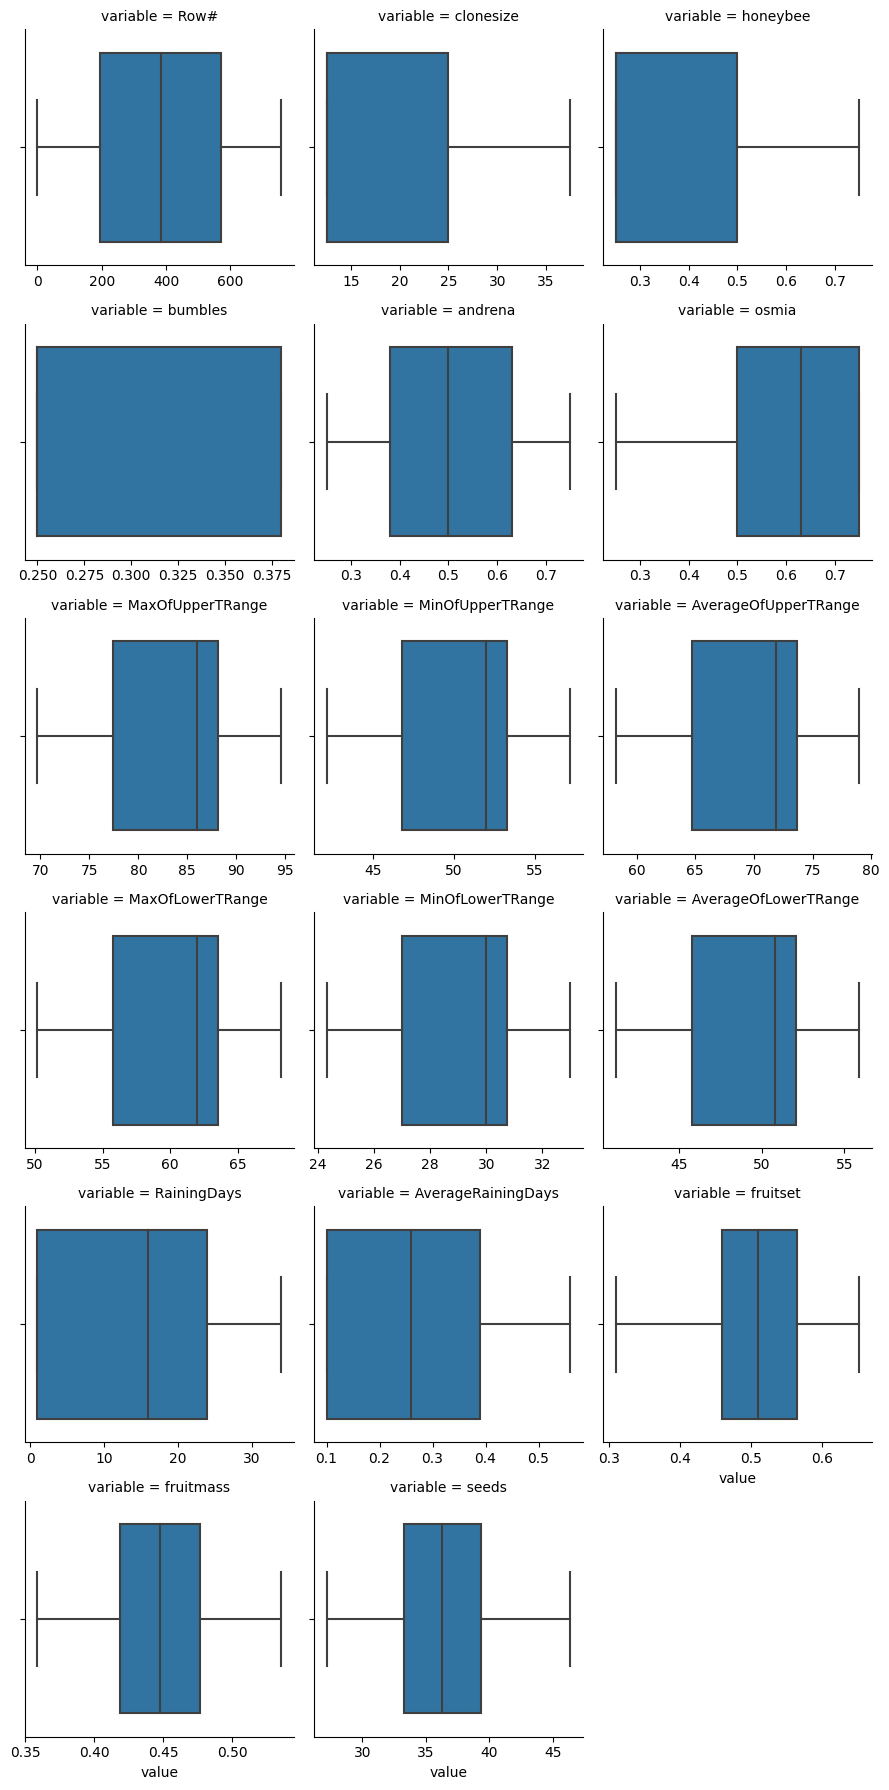

In [775]:
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

In [776]:
plt.show()

In [777]:
model.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


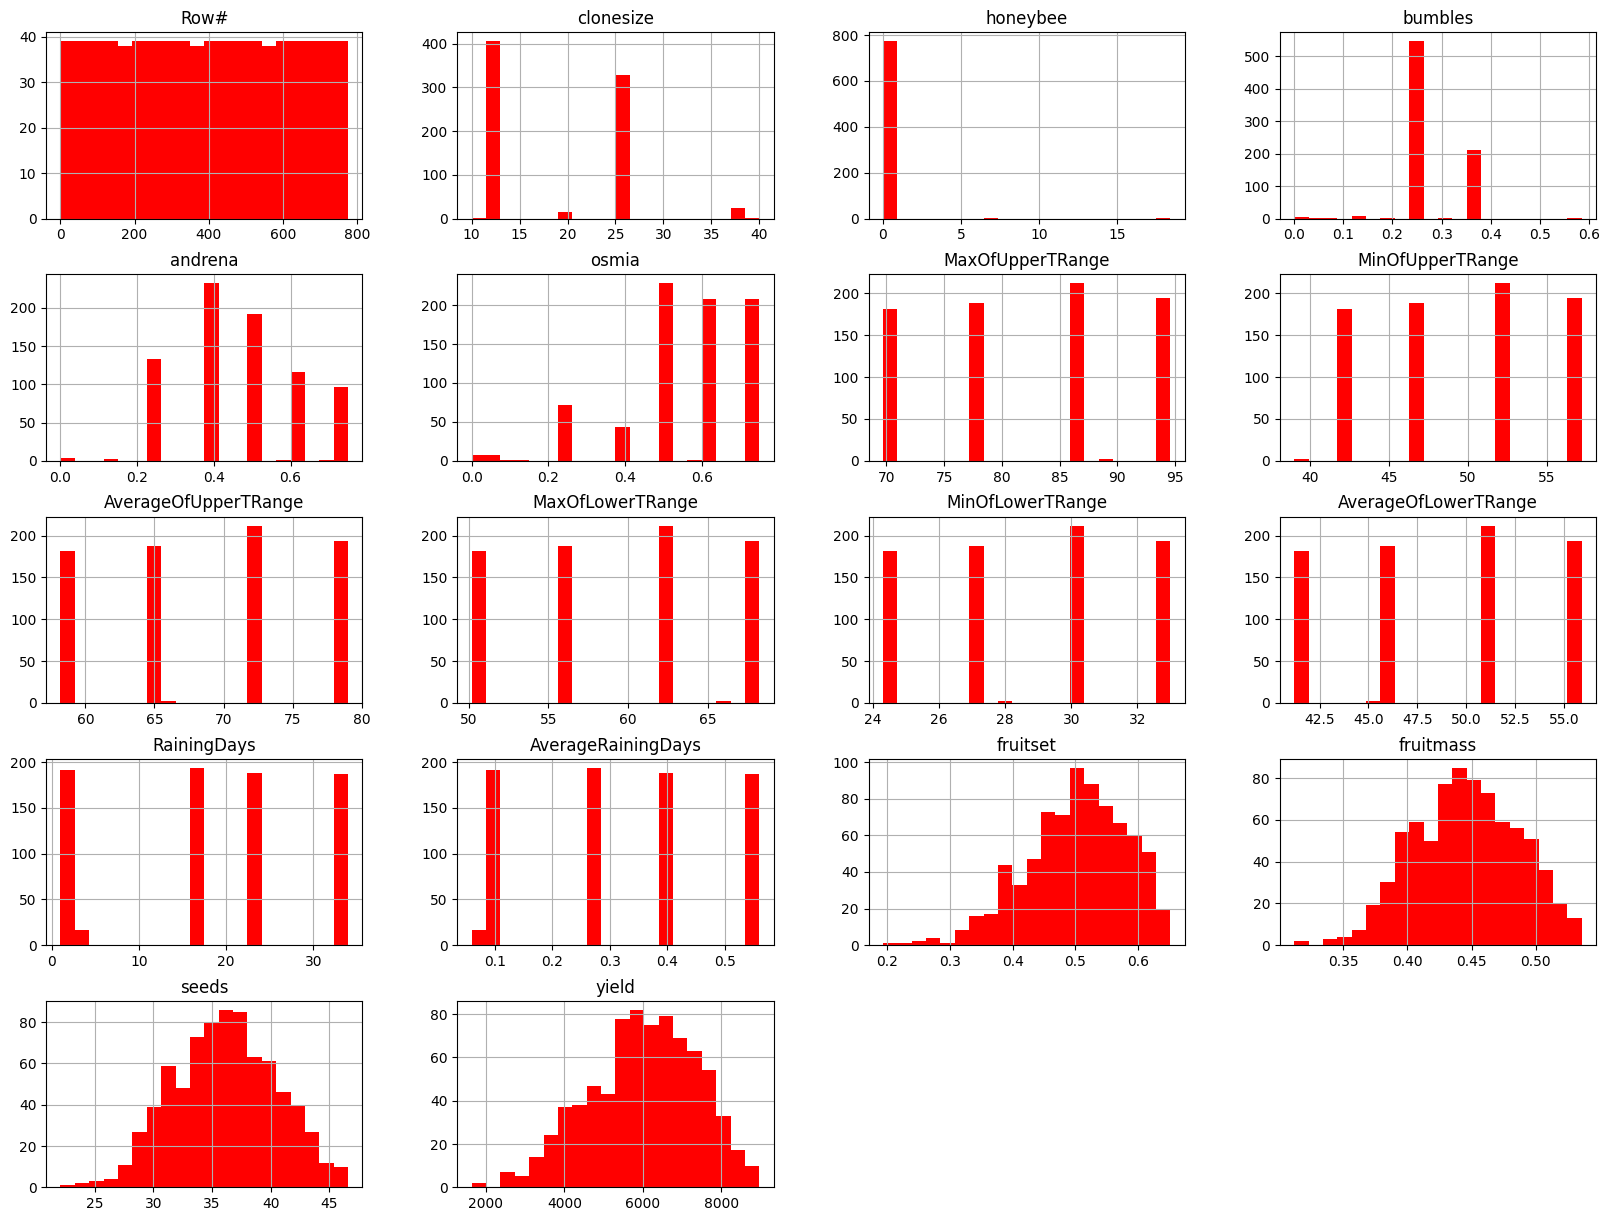

In [778]:
model.hist(layout=(5,4), figsize=(20,15), bins=20,color='red')
plt.title('histogram of data')
plt.show()

<Axes: ylabel='yield'>

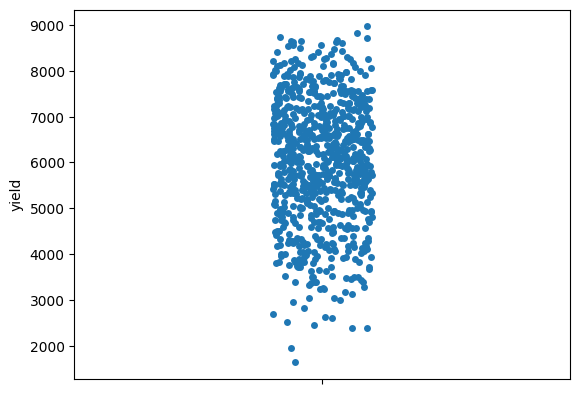

In [779]:
sns.stripplot(y=model['yield'])

Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9774485367467639) feature seeds. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.954948440306085) feature fruitmass. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.991316888206444) feature AverageRainingDays. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (1.0) feature MaxOfUpperTRange. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.ma

[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <Axes: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <Axes: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<Axes: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <Axes: title={'center': 'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

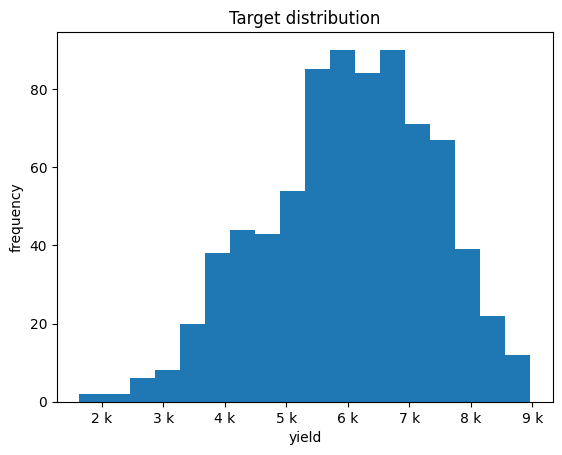

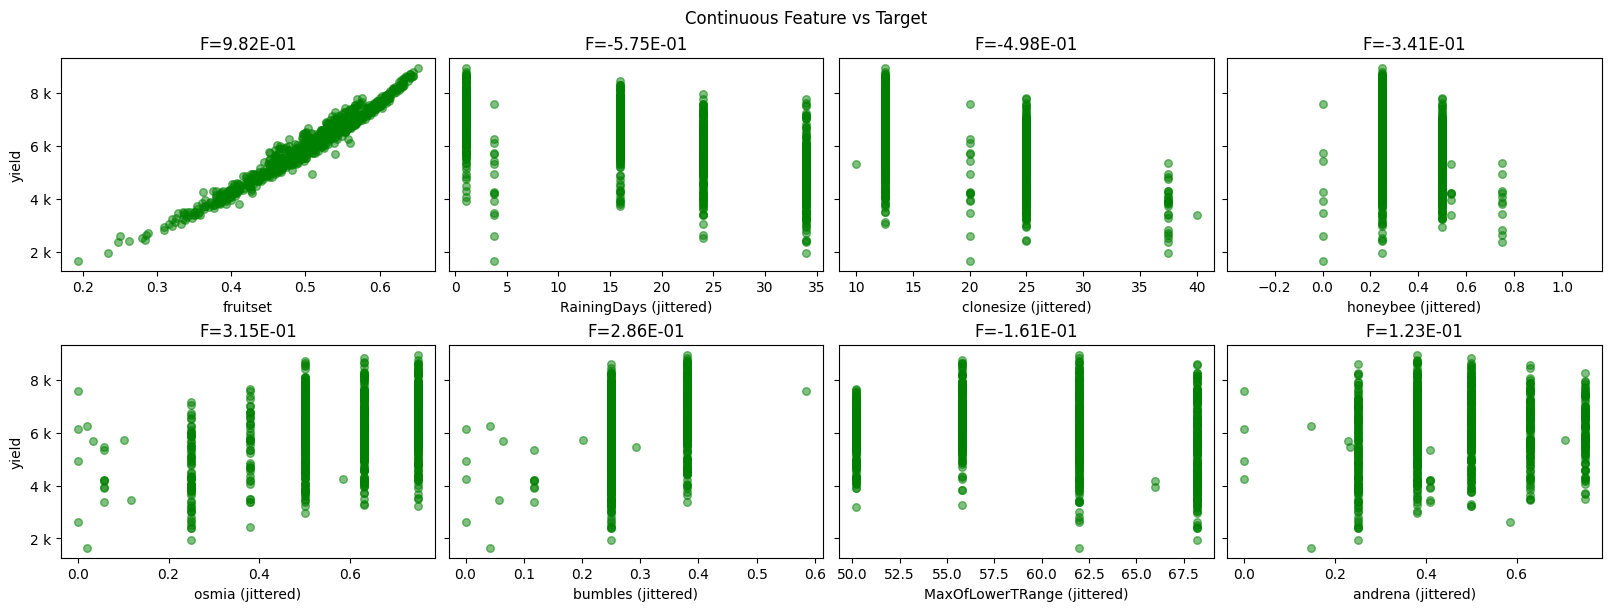

In [780]:
#EDA using dabl
!pip install dabl
import dabl
dabl.plot(model, target_col="yield",color='green')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='clonesize', ylabel='yield'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


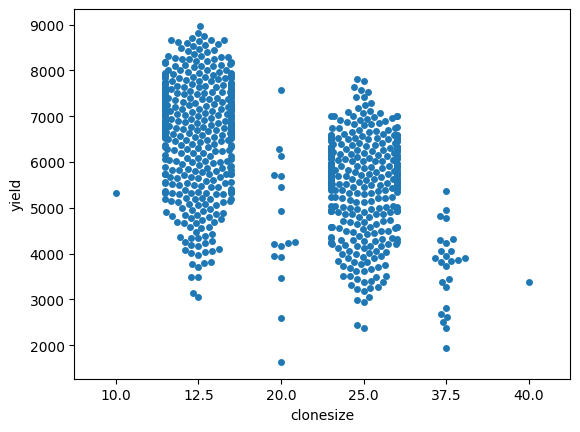

In [781]:
sns.swarmplot(x="clonesize", y="yield", data=model)

<Figure size 2000x2000 with 0 Axes>

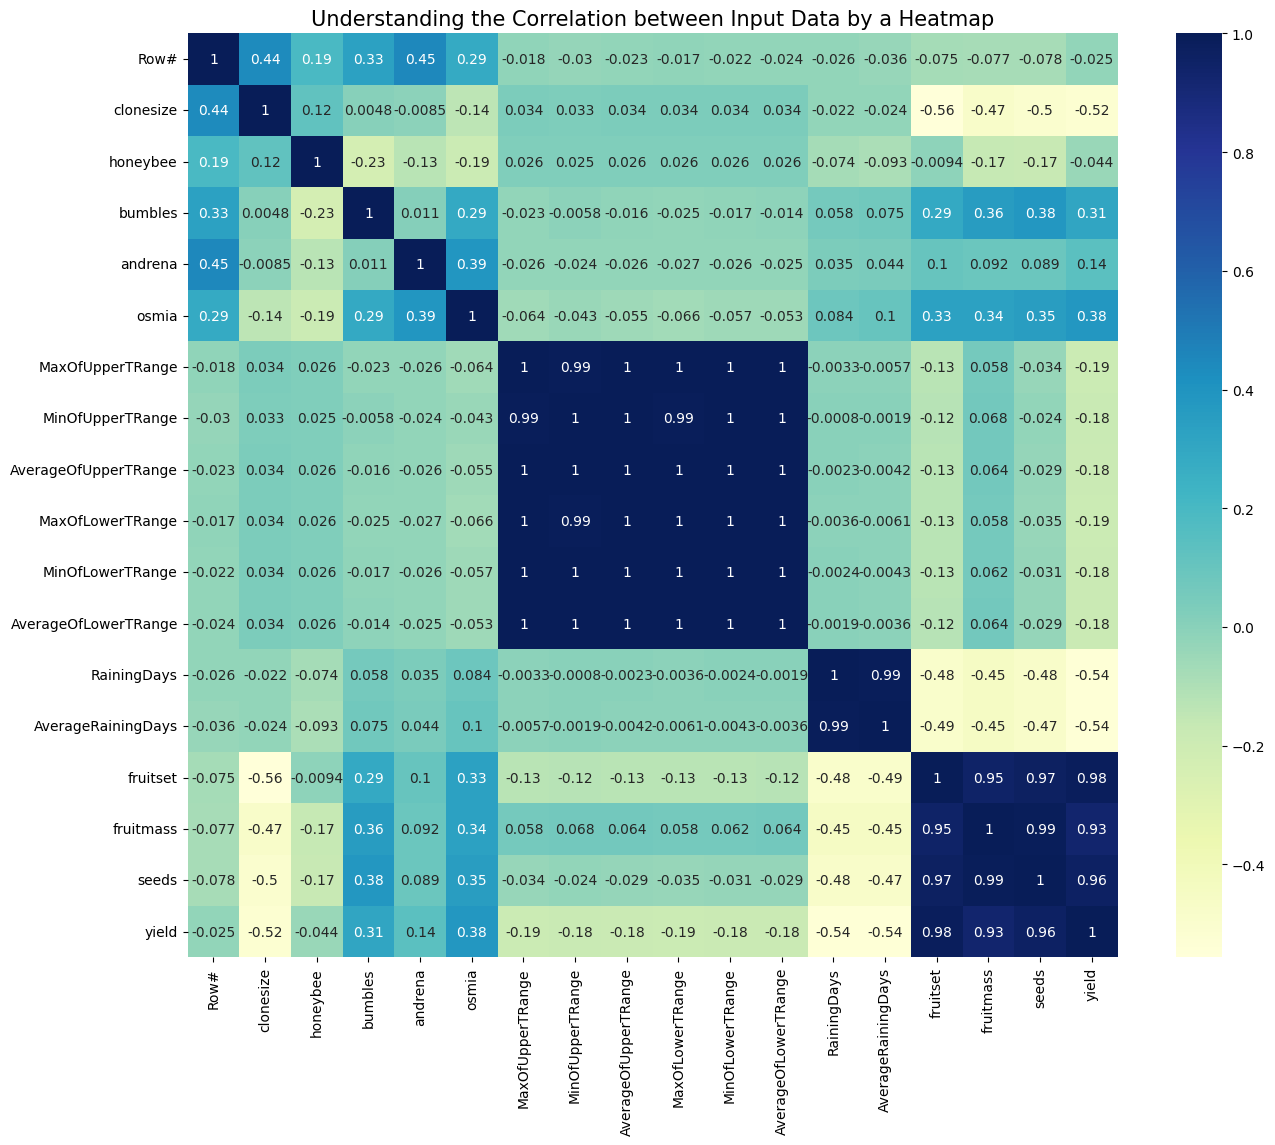

In [782]:
plt.figure(figsize=(20,20))
c = model.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot = True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

In [783]:
#Feature Selection
#splitting IQR processed data into independent and dependent features
X = iqr_data.drop(columns=['yield'])
y = iqr_data[['yield']]

In [784]:
  #splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

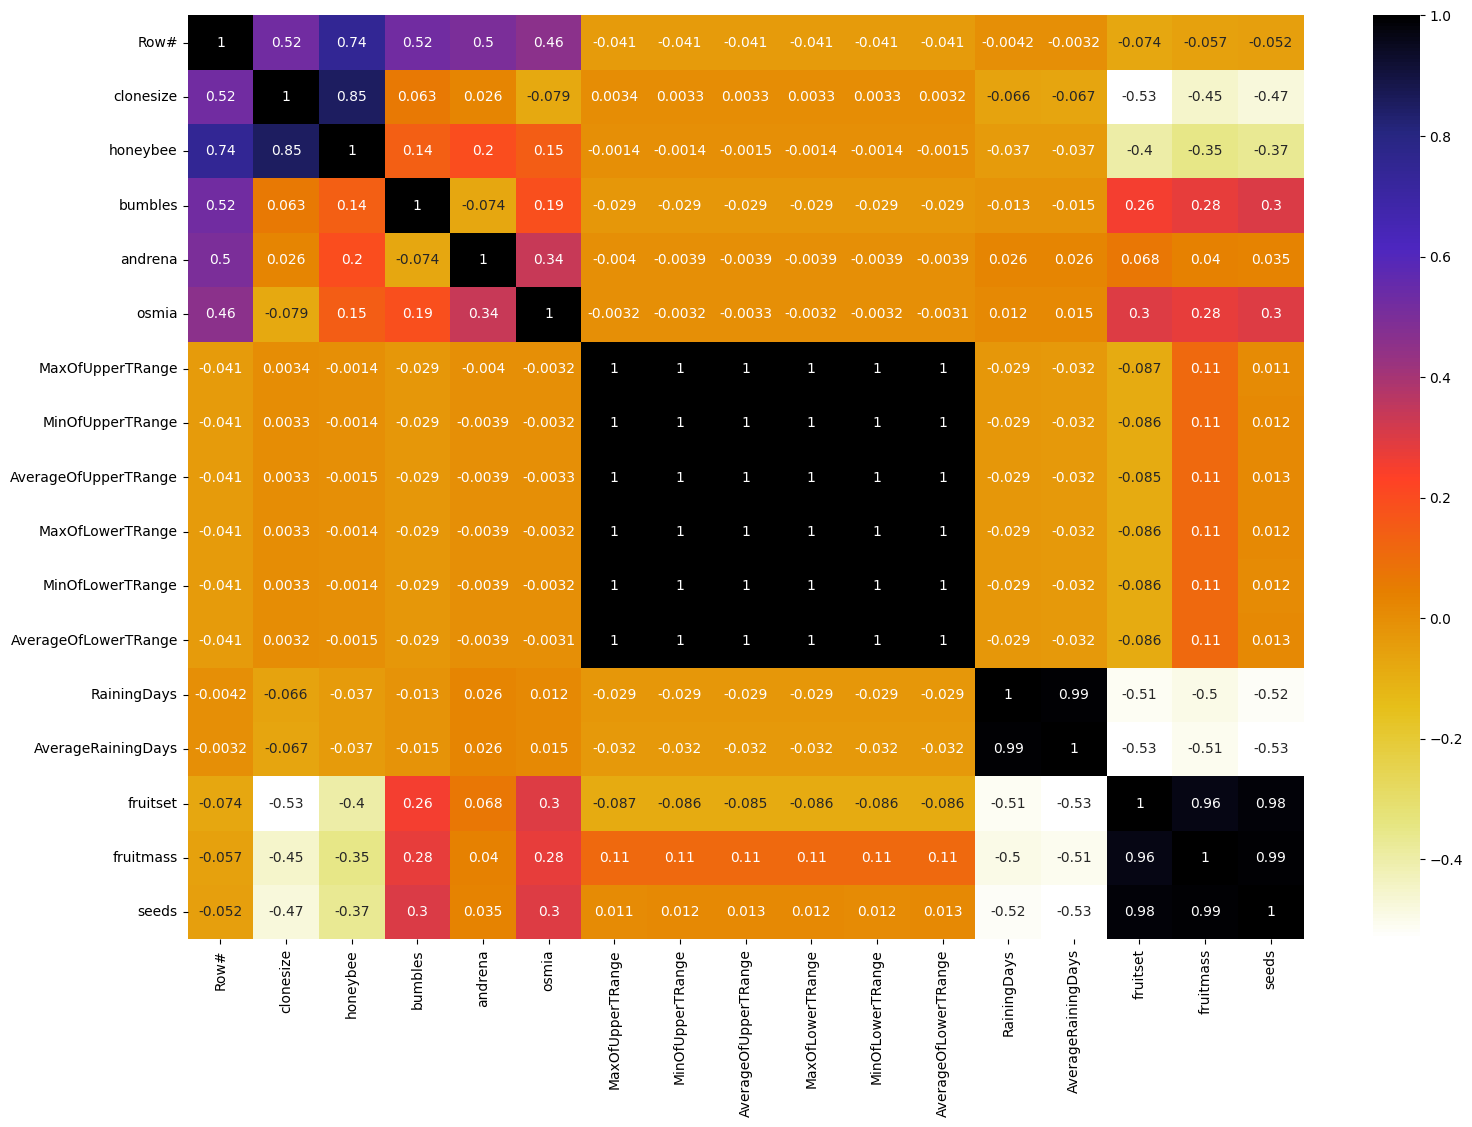

In [785]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [786]:
#With this function, we can select highly correlated features
#The first feature that is correlated with any other feature will be removed
# def correlation(dataset, threshold):
#   col_corr = set() #Set of all the names of Correlated Columns
#   corr_matrix = dataset.corr()
#   for i in range (len(corr_matrix.columns)):
#     for j in range(i):
#       if (corr_matrix.iloc[i,j]) > threshold:
#         colname = corr_matrix.columns[i] #getting the name of the column
#         col_corr.add(colname)
#   return col_corr

In [787]:
# corr_features = correlation(X_train, 0.7)
# len(set(corr_features))

In [788]:
# corr_features = {
#     'AverageOfLowerTRange',
#     'AverageOfUpperTRange',
#     'AverageRainingDays',
#     'MaxOfLowerTRange',
#     'MinOfLowerTRange',
#     'MinOfUpperTRange',
#     'MaxOfUpperTRange'
#     'honeybee',
#     }
# corr_features

In [789]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [790]:

# def select_features_info_based(X_train, y_train, X_test):
#     # ... your implementation ...

#     # Ensure that the function returns a tuple or another iterable
#     return X_train_fs_model, X_test_fs_model, fs_info




In [791]:
# #Modelling on
# X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)
# y=model['yield']

In [792]:
#Linear regresssion
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
pred_linear = reg.predict(X_test)

In [793]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [794]:
mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

In [795]:
print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 88.220
MSE: 12398.611
RMSE: 111.349
R-Square: 0.992


In [796]:
from sklearn.ensemble import RandomForestRegressor

In [797]:
# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(max_depth=1)

In [798]:
# fitting the model
rf_model.fit(X_train, y_train)
pred_rf=rf_model.predict(X_test)
pred_rf_train=rf_model.predict(X_train)
pred_rf=pred_rf.reshape(151,1)

<ipython-input-798-26d8823fb450>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [799]:
mae_rf_train = mean_absolute_error(y_train, pred_rf_train)
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)
print('MAE_train: %.3f' % mae_rf_train)
print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE_train: 573.946
MAE: 573.497
MSE: 464755.558
RMSE: 681.730
R-Square: 0.712


In [800]:
from sklearn.tree import DecisionTreeRegressor

In [801]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
pred_dtree = dtree_reg.predict(X_test)

In [802]:

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

In [803]:
print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 173.191
MSE: 45317.084
RMSE: 212.878
R-Square: 0.972


In [804]:
import xgboost
from xgboost import XGBRegressor

In [805]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

In [806]:
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

In [807]:
print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 112.966
MSE: 20339.709
RMSE: 142.617
R-Square: 0.987


In [809]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred_linear = reg.predict(X_test)
print(reg.predict([[2,8,0.9,1,10,5,9,5,8,7,6,5,8,9,4,6,4]]))

[[-117443.0515903]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


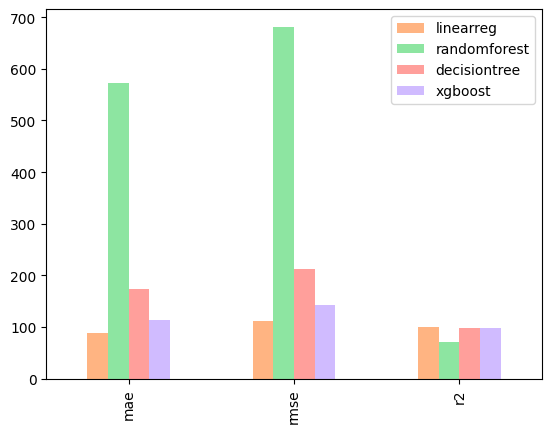

In [810]:
#Model Evaluation
error_rec = {
    "linearreg": {
       "mae": mae_linear,
       "rmse": rmse_linear,
       'r2': rsq_linear*100
    },
    "randomforest": {
       "mae": mae_rf,
       "rmse": rmse_rf,
       'r2': rsq_rf*100
    },
    "decisiontree": {
       "mae": mae_dtree,
       "rmse": rmse_dtree,
       'r2': rsq_dtree*100
    },
    "xgboost": {
       "mae": mae_xgb,
       "rmse": rmse_xgb,
       'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
                             color=[
                                sns.color_palette("pastel")[1],
                                sns.color_palette("pastel")[2],
                                sns.color_palette("pastel")[3],
                                sns.color_palette("pastel")[4]]);

In [811]:
#dump selected model
import pickle
pickle.dump(reg, open('blue.pkl','wb'))